# BERTopic for detecting the subject of arXiv abstracts

The goal of this notebook is two-fold. Given a set of arXiv papers we want to:

1. Organize the list of papers into classes defined by topic

1. Given a new paper, predict the most likely topic class it belongs to

We will use the package BERTopic to do this. First, we need to install it. 

In [1]:
%pip install bertopic

                                              0.0/120.7 kB ? eta -:--:--
     -------------------------------------- 120.7/120.7 kB 2.4 MB/s eta 0:00:00
                                              0.0/595.9 kB ? eta -:--:--
     ------------                           194.6/595.9 kB 5.9 MB/s eta 0:00:01
     --------------------                   317.4/595.9 kB 3.9 MB/s eta 0:00:01
     ----------------------------           450.6/595.9 kB 3.5 MB/s eta 0:00:01
     -------------------------------------  593.9/595.9 kB 3.7 MB/s eta 0:00:01
     -------------------------------------- 595.9/595.9 kB 3.1 MB/s eta 0:00:00
                                              0.0/88.2 kB ? eta -:--:--
     ---------------------------------------- 88.2/88.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/8.3 MB ? eta -:--:--
                                              0.2

In [3]:
import numpy as np
import pandas as pd
from bertopic import BERTopic
import matplotlib.pyplot as plt

In [4]:
## Load our abstract data and convert it into a list of strings.

data = pd.read_csv('../data/df_experiment')
abstracts = list(data['summary'])

## Do the same for title data
titles = list(data['title'])

In [4]:
## Create a default topic model and fit the abstracts.

topic_model = BERTopic(verbose=True)
topic_model.fit_transform(abstracts)

Batches: 100%|██████████| 140/140 [05:07<00:00,  2.20s/it]
2023-05-23 11:28:24,001 - BERTopic - Transformed documents to Embeddings
2023-05-23 11:29:39,291 - BERTopic - Reduced dimensionality
2023-05-23 11:29:39,947 - BERTopic - Clustered reduced embeddings


([47,
  45,
  5,
  5,
  -1,
  16,
  -1,
  2,
  -1,
  32,
  23,
  45,
  27,
  -1,
  5,
  -1,
  7,
  -1,
  7,
  7,
  40,
  -1,
  9,
  30,
  23,
  5,
  1,
  1,
  -1,
  35,
  -1,
  22,
  -1,
  -1,
  -1,
  -1,
  -1,
  1,
  17,
  -1,
  -1,
  23,
  1,
  -1,
  39,
  27,
  -1,
  -1,
  -1,
  31,
  31,
  -1,
  5,
  -1,
  36,
  5,
  -1,
  45,
  5,
  27,
  10,
  -1,
  -1,
  36,
  23,
  -1,
  2,
  -1,
  -1,
  19,
  7,
  -1,
  41,
  1,
  -1,
  16,
  -1,
  -1,
  -1,
  39,
  31,
  2,
  10,
  7,
  5,
  16,
  16,
  35,
  -1,
  2,
  4,
  5,
  28,
  -1,
  39,
  -1,
  -1,
  19,
  -1,
  -1,
  2,
  47,
  5,
  39,
  -1,
  5,
  7,
  5,
  -1,
  -1,
  -1,
  9,
  1,
  -1,
  -1,
  -1,
  16,
  -1,
  19,
  5,
  -1,
  -1,
  46,
  -1,
  38,
  19,
  1,
  1,
  42,
  5,
  -1,
  -1,
  9,
  5,
  32,
  -1,
  -1,
  -1,
  -1,
  5,
  -1,
  -1,
  -1,
  17,
  2,
  -1,
  21,
  -1,
  -1,
  -1,
  8,
  40,
  40,
  -1,
  36,
  -1,
  -1,
  -1,
  23,
  5,
  -1,
  46,
  7,
  -1,
  -1,
  47,
  23,
  19,
  -1,
  -1,
  -1,
  10,
  2,
  19,


In [5]:
## Look at the size and number of topics

freqs = topic_model.get_topic_freq()
num_topics = len(freqs) - 1

print(f'BERTopic found {num_topics} different topics.')
print('The document counts for the top 10 largest topics:')

freqs.head(11)

BERTopic found 53 different topics.
The document counts for the top 10 largest topics:


,Topic,Count
0,-1,1744
1,0,189
2,1,169
3,2,155
4,3,144
5,4,142
6,5,106
7,6,105
8,7,87
9,8,86


- The first and largest category labeled '-1' refers to **outlier** documents.

- These do not obviously belong to any other category.

- Later, we explore ways to reduce the number of outliers.

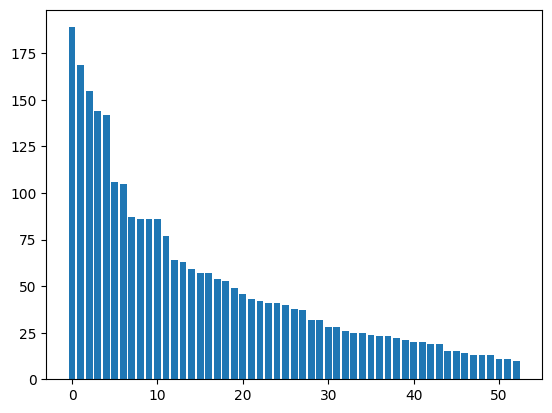

In [6]:
## Is there a sharp drop-off in the number of topics?

fig = plt.figure()
plt.bar(x=freqs['Topic'][1:], height=freqs['Count'][1:])
plt.show()


In [7]:
## Identify the top 10 most frequent topics by common words:

topic_model.visualize_barchart(top_n_topics=9)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.017241445828184057, 0.018006917555193725,
                    0.018273930108813338, 0.026255397878276788,
                    0.027737499784923167],
              'xaxis': 'x',
              'y': [fusion  , modules  , finite  , categories  , category  ],
              'yaxis': 'y'},
             {'marker': {'color': '#0072B2'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.014939746803058715, 0.016865203258333086,
                    0.01702875583607597, 0.01891419831515168, 0.020199427496093644],
              'xaxis': 'x2',
              'y': [of  , the  , theory  , gauge  , theories  ],
              'yaxis': 'y2'},
             {'marker': {'color': '#CC79A7'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.015679008403701088, 0.016626075842558687,
                    0.018420514675420645, 0.019804367629411325,
                    0.02056681182977145],
              'xaxis': 'x3',
              'y': [in  , solutions  , navier  , the  , stokes  ],
              'yaxis': 'y3'},
             {'marker': {'color': '#E69F00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.02222394683773068, 0.02235545262307488,
                    0.023406527254812397, 0.024424038576701203,
                    0.033067098642942556],
              'xaxis': 'x4',
              'y': [local  , adic  , group  , langlands  , representations  ],
              'yaxis': 'y4'},
             {'marker': {'color': '#56B4E9'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.020937204986041225, 0.02170122785256489,
                    0.021728563569975747, 0.022593388276177278,
                    0.05483297416553777],
              'xaxis': 'x5',
              'y': [metrics  , manifolds  , manifold  , complex  , kahler  ],
              'yaxis': 'y5'},
             {'marker': {'color': '#009E73'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.014575620895097162, 0.0148780166484719, 0.01588238009458406,
                    0.017946048139998855, 0.027893460558858628],
              'xaxis': 'x6',
              'y': [in  , of  , model  , the  , random  ],
              'yaxis': 'y6'},
             {'marker': {'color': '#F0E442'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.021043567930825458, 0.02139473600712389,
                    0.021888510693053663, 0.026208991417602148,
                    0.03731947416098618],
              'xaxis': 'x7',
              'y': [minimal  , minkowski  , curvature  , convex  , surfaces  ],
              'yaxis': 'y7'},
             {'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.018023225073025805, 0.020525470945824926,
                    0.021978094596789382, 0.025237557140390807,
                    0.026143327409166237],
              'xaxis': 'x8',
              'y': [solutions  , the  , nonlinear  , equation  , schrodinger  ],
              'yaxis': 'y8'},
             {'marker': {'color': '#0072B2'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.019592065036353412, 0.02277853690167639,
                    0.024263332359453167, 0.025670748294778636,
                    0.02751815051043486],
              'xaxis': 'x9',
              'y': [solutions  , reaction  , control  , system  , diffusion  ],
              'yaxis': 'y9'}],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 0',
                                'x': 0.0875,
                                'xanchor': 'center',
                                'xref': 'paper',
                        

In [8]:
## Visualize the topic 'distances' in two dimensions:

topic_model.visualize_topics()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'category | categories | finite | modules | fusion', 189],
                                   [1, 'theories | gauge | theory | the | of', 169],
                                   [2, 'stokes | the | navier | solutions | in', 155],
                                   [3, 'representations | langlands | group | adic | local', 144],
                                   [4, 'kahler | complex | manifold | manifolds | metrics', 142],
                                   [5, 'random | the | model | of | in', 106],
                                   [6, 'surfaces | convex | curvature | minkowski | minimal', 105],
                                   [7, 'schrodinger | equation | nonlinear | the | solutions', 87],
                                   [8, 'diffusion | system | control | reaction | solutions', 86],
                                   [9, 'vertex | algebra | algebras | operator | modules', 86],
                                   [10, 'homology | knot | invariants | knots | links', 86],
                                   [11, 'polynomials | of | functions | and | coefficients', 77],
                                   [12, 'lie | modules | simple | superalgebras | algebra', 64],
                                   [13, 'solutions | boundary | problem | existence | solution', 63],
                                   [14, 'ricci | curvature | flow | solitons | soliton', 59],
                                   [15, 'hopf | algebras | algebra | nichols | cocommutative', 57],
                                   [16, 'spacetimes | black | einstein | spacetime | in', 57],
                                   [17, 'stochastic | brownian | time | noise | processes', 54],
                                   [18, 'manifolds | manifold | curvature | weyl | riemannian', 53],
                                   [19, 'topological | states | models | ground | phase', 49],
                                   [20, 'groups | characters | group | finite | irreducible', 46],
                                   [21, 'baxter | yang | braces | skew | maps', 43],
                                   [22, 'quantum | compact | groups | group | algebras', 42],
                                   [23, 'bethe | integrable | ansatz | quantum | the', 41],
                                   [24, 'hall | quantum | algebra | cluster | algebras', 41],
                                   [25, 'fractional | time | solutions | derivative | laplacian', 40],
                                   [26, 'lie | groupoid | groupoids | algebroids | group', 38],
                                   [27, 'wave | transmission | inverse | problem | the', 37],
                                   [28, 'invariants | curve | recursion | curves | witten', 32],
                                   [29, 'algebras | baxter | lie | rota | associative', 32],
                                   [30, 'neural | networks | learning | network | deep', 28],
                                   [31, 'painleve | equation | equations | integrable | system', 28],
                                   [32, 'eigenvalue | laplacian | eigenvalues | upper | domain', 26],
                                   [33, 'elastic | energy | rod | the | strain', 25],
                                   [34, 'finsler | slant | landsberg | riemannian | curvature', 25],
                                   [35, 'quantum | algorithm | gates | qubits | circuit', 24],
                                   [36, 'hamiltonian | symplectic | systems | contact | bracket', 23],
                                   [37, 'varieties | schubert | variety | flag | cohomology', 23],
                                   [38, 'quantized | quantum | affine | algebras | algebra', 22],
                                   [39, 'quantum | entropy | channel | channels | information', 21],
                                   [40, 'quantum | states | time | thermal | gibbs', 20],
                                   [41, 'minimizing | area |

In [9]:
## Many topics are clustered close together. We can try to get a sense of dependencies with
## Heirarchal clustering.

heirarchal_topics = topic_model.hierarchical_topics(abstracts)

100%|██████████| 52/52 [00:00<00:00, 65.88it/s]


In [12]:
## Now visualize the heirarchy with labels:

topic_model.visualize_hierarchy()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 1.13248667, 1.13248667, 0.        ]),
              'xaxis': 'x',
              'y': array([ -5.,  -5., -15., -15.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 1.02613973, 1.02613973, 0.        ]),
              'xaxis': 'x',
              'y': array([-25., -25., -35., -35.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([1.13248667, 1.21413589, 1.21413589, 1.02613973]),
              'xaxis': 'x',
              'y': array([-10., -10., -30., -30.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.95340396, 0.95340396, 0.        ]),
              'xaxis': 'x',
              'y': array([-55., -55., -65., -65.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.99103116, 0.99103116, 0.95340396]),
              'xaxis': 'x',
              'y': array([-45., -45., -60., -60.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 1.00306835, 1.00306835, 0.        ]),
              'xaxis': 'x',
              'y': array([-75., -75., -85., -85.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([1.00306835, 1.27212735, 1.27212735, 0.        ]),
              'xaxis': 'x',
              'y': array([-80., -80., -95., -95.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.99103116, 1.3545734 , 1.3545734 , 1.27212735]),
              'xaxis': 'x',
              'y': array([-52.5, -52.5, -87.5, -87.5]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([1.21413589, 1.39876147, 1.39876147, 1.3545734 ]),
              'xaxis': 'x',
              'y': array([-20., -20., -70., -70.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.79711438, 0.79711438, 0.        ]),
              'xaxis': 'x',
              'y': array([-105., -105., -115., -115.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(35,205,205)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.68198384, 0.68198384, 0.        ]),
              'xaxis': 'x',
              'y': array([-135., -135., -145., -145.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(35,205,205)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.72795952, 0.72795952, 0.68198384]),
              'xaxis': 'x',
            

In [5]:
## Given any class labels for our documents, BERTopic can display topic-per-class information

classes = list(data['primary_category'])
abs = list(data['summary'])

topic_model = BERTopic(verbose=True)
topics , probs = topic_model.fit_transform(abs)
topics_per_class = topic_model.topics_per_class(abs,classes=classes)

Batches: 100%|██████████| 140/140 [06:29<00:00,  2.78s/it]
2023-05-23 12:18:26,680 - BERTopic - Transformed documents to Embeddings
2023-05-23 12:19:32,714 - BERTopic - Reduced dimensionality
2023-05-23 12:19:33,303 - BERTopic - Clustered reduced embeddings
56it [00:03, 15.36it/s]


In [10]:
topic_model.visualize_topics_per_class(topics_per_class,width=900,height=700,top_n_topics=20)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'hovertext': [<b>Topic 0</b><br>Words: bms, microscopic, aspect,
                            gauge, like, <b>Topic 0</b><br>Words: gauge, theories,
                            in, theory, the, <b>Topic 0</b><br>Words: target,
                            theories, category, tachikawa, branch, <b>Topic
                            0</b><br>Words: fermi, thomas, majorana, homology,
                            transformation, <b>Topic 0</b><br>Words: condensing,
                            higher, categories, enacted, monoidality, <b>Topic
                            0</b><br>Words: noncommutative, bundle, attaches, lets,
                            ourselves, <b>Topic 0</b><br>Words: field, theories,
                            oriented, theory, quantization, <b>Topic
                            0</b><br>Words: quantum, modular, and, the, connection,
                            <b>Topic 0</b><br>Words: kdv, negative, mkdv, miura,
                            hierarchies, <b>Topic 0</b><br>Words: symmetry,
                            defects, topological, gauge, phases, <b>Topic
                            0</b><br>Words: bordism, skk, string, framed, groups,
                            <b>Topic 0</b><br>Words: theories, theory, gauge, the,
                            symmetry, <b>Topic 0</b><br>Words: dirac,
                            noncommutative, poset, posets, brief, <b>Topic
                            0</b><br>Words: beltrami, hexagonal, lattice, research,
                            wolfram, <b>Topic 0</b><br>Words: grushin,
                            quantizations, cylinder, embedding, particle, <b>Topic
                            0</b><br>Words: noncommutative, eigenfields, fields,
                            symmetry, curvatures],
              'marker': {'color': '#E69F00'},
              'name': '0_theories_gauge_theory_the',
              'orientation': 'h',
              'type': 'bar',
              'visible': True,
              'x': array([  5,  35,   1,   1,   2,   2,   3,  15,   1,   3,   2, 108,   2,   1,
                            1,   4], dtype=int64),
              'y': array(['qc', 'ph', 'sg', 'ap', 'ct', 'oa', 'gt', 'qa', 'si', 'el', 'at', 'th',
                          'na', 'cd', 'fa', 'dg'], dtype=object)},
             {'hoverinfo': 'text',
              'hovertext': [<b>Topic 1</b><br>Words: stack, let, over, adic,
                            group, <b>Topic 1</b><br>Words: representations, group,
                            langlands, groups, adic, <b>Topic 1</b><br>Words:
                            representations, langlands, adic, local, group,
                            <b>Topic 1</b><br>Words: metamorphism, transform,
                            covariant, metamorphisms, reading, <b>Topic
                            1</b><br>Words: angled, right, coxeter, von,
                            representations, <b>Topic 1</b><br>Words: anosov,
                            denoting, least, subgroup, rank, <b>Topic
                            1</b><br>Words: reductive, rings, linearly, group,
                            copies, <b>Topic 1</b><br>Words: motives, enriquez,
                            tate, teichmuller, motivic, <b>Topic 1</b><br>Words:
                            vogtmann, valuation, residue, henselian, pythagoras,
                            <b>Topic 1</b><br>Words: groups, lie, ulam, group,
                            semisimplification, <b>Topic 1</b><br>Words: frames,
                            banach, representation, group, analytic, <b>Topic
                            1</b><br>Words: unstable, interpretation, kempf, shah,
                            busemann, <b>Topic 1</b><br>Words: pu, representations,
                            character, peripheral, triangle],
              'marker': {'color': '#56B4E9'},
              'name': '1_representations_group_langlands_groups',
              'orientation': 'h',
            

In [19]:
## Print the top 10 most important words (by c-tf-idf score) for all categories.

keywords = topic_model.generate_topic_labels(nr_words=10)

for topic in keywords:
    for word in topic.split('_'):
        print(word)
    print()


-1
the
of
we
and
in
to
is
for
on
that

0
theories
gauge
theory
the
symmetry
of
in
and
field
to

1
representations
group
langlands
groups
adic
local
of
representation
let
reductive

2
stokes
the
navier
solutions
equations
flows
in
euler
fluid
for

3
kahler
complex
manifold
manifolds
metrics
holomorphic
metric
on
bundle
we

4
random
the
model
of
in
and
process
is
we
for

5
diffusion
system
control
solutions
reaction
the
problem
time
optimal
in

6
homology
knot
knots
invariants
links
skein
quandle
invariant
tqft
khovanov

7
vertex
algebra
algebras
operator
modules
conformal
level
of
zhu
central

8
lie
modules
superalgebras
simple
algebra
module
of
superalgebra
highest
the

9
functions
of
combinatorial
and
polynomials
coefficients
series
partitions
symmetric
tableaux

10
stochastic
time
noise
the
brownian
equation
processes
in
and
of

11
equation
schrodinger
solutions
nonlinear
the
periodic
nls
in
for
cubic

12
spacetimes
spacetime
black
einstein
vacuum
the
in
field
and
of

13
hopf
algebra

# Summary of the topic results

- The '-1' topic label refers to those which are 'outliers' according to the HDBSCAN clustering algorithm, i.e. they do not strongly belong to any identified topic.
- Roughly 1700/4400 uncategorized articles.
- 59 topics found
- Only the top 19 contain more than 50 articles.

## Obvious issues with the classification

1. Many english stop words showing in top 10 keywords for a given topic.
1. Many words are basically repeated; e.g. manifold manifolds, metric metrics
1. Many key 2 and 3 grams are appearing split up, e.g. 'equation' as a keyword for the schrodinger equation topic

## Two main factors that determine our understanding of the topics
1. The clusters themselves (i.e. are the sentence embeddings and dim reduction capturing the real topic info)
1. Are we doing a bad job of associating english words to the clusters?

First issue: Solve with hyperparameter tuning for UMAP, HDBSCAN, changing embeddings.

Second issue: Modify the c-tf-idf scores for categories by

- changing tokenization of the concatenated cluster docs
- changing the way the tf-idf score is calculated for a tokenization scheme.
- adding in additional functionality to tune topic representation (MMR, KeyBERT)

In [29]:
## Example of presence of stop words and/or general 'math' words
topic_model.get_topic(2)

[('theories', 0.0197099083341116),
 ('gauge', 0.01934426130249267),
 ('theory', 0.01594558330108792),
 ('the', 0.015862711841573417),
 ('of', 0.013913465129971759),
 ('in', 0.013624898330914199),
 ('and', 0.013546450361437907),
 ('symmetry', 0.01334182011153266),
 ('field', 0.012765721359662141),
 ('to', 0.012455046976518008)]

In [31]:
# graph and graphs appearing together. Many such cases
topic_model.get_topic(49)

[('matrix', 0.060234054583602405),
 ('graph', 0.05369734316606168),
 ('matrices', 0.03799291392012613),
 ('if', 0.02901478386313989),
 ('graphs', 0.026124278890558565),
 ('is', 0.02607339465900343),
 ('bidiagonal', 0.025863991899079324),
 ('adjacency', 0.02380334796842172),
 ('schur', 0.02206352677958234),
 ('integral', 0.021456701379642847)]

In [33]:
# General math words like 'functions' and 'coefficients'
topic_model.get_topic(7)

[('polynomials', 0.024583584126169435),
 ('functions', 0.01783071990260561),
 ('of', 0.017296936083285697),
 ('symmetric', 0.015854645032744315),
 ('and', 0.0153385388625035),
 ('the', 0.014929623100994806),
 ('coefficients', 0.014849735165501034),
 ('combinatorial', 0.014818906458732978),
 ('tableaux', 0.014642440811443133),
 ('series', 0.014469269900460243)]

In [34]:
# 2-grams and 3-grams being split up, e.g. 'Schr\"odinger equation'
topic_model.get_topic(9)

[('equation', 0.028282237270237525),
 ('schrodinger', 0.02702969855232615),
 ('nonlinear', 0.02315591339969348),
 ('solutions', 0.019068102648466426),
 ('the', 0.01894799616835625),
 ('periodic', 0.018932492369870303),
 ('nls', 0.017445828914596947),
 ('in', 0.015959778719372868),
 ('for', 0.014955636564029711),
 ('cubic', 0.013458778120634429)]

## Predicting the best cluster for a newly input document.

In [ ]:
## Placeholder

### Improving topic representation:

#### How are the top 10 words for each topic generated?

A C-tfidf scheme is used:
- All documents in a cluster are concatenated with a space
- These are tokenized and the "class" tf-idf score is computed. 
    
    (a) term frequency is the word count within the class is divided by the total number 
    of words in the class.

    
    (b) inverse document frequency is (the log of) the original number of documents divided by the the number of total occurences of the word across all classes. (This should penalize 'general' math words)


#### Modify the tokenizer to account for the high presence of 2-grams, and to remove stop words.



In [5]:
# To reduce the appearance of redudant words, we can add 'MMR' or maximal marginal relevance
# to the topic representation part of the model.

from bertopic.representation import MaximalMarginalRelevance
from bertopic import BERTopic

rep_model = MaximalMarginalRelevance(diversity=0.3)
topic_model = BERTopic(representation_model=rep_model)
topic_model.fit_transform(abstracts)
topic_model.generate_topic_labels(nr_words=10,topic_prefix=True,separator=' ')


['-1 of be space prove group these category theory algebras type',
 '0 quantum lie algebras modules affine groups superalgebras weyl weight root',
 '1 gauge theories symmetry spin fields topological symmetries massless gravity noncommutative',
 '2 representations langlands adic local we irreducible subgroup conjecture unitary correspondence',
 '3 kahler manifolds metrics holomorphic bundles ricci sasaki calabi hermitian toric',
 '4 stokes navier flows euler incompressible velocity compressible stability data vorticity',
 '5 random model process limit transition at by ensemble matrices percolation',
 '6 modules gorenstein hereditary tilting quiver dimension subcategories auslander morita projective',
 '7 quantum states entropy algorithms entanglement systems circuit channel qubits gates',
 '8 of polynomials functions combinatorial symmetric tableaux partitions identities diagrams schur',
 '9 schrodinger nonlinear solutions periodic nls initial waves well nonlinearity posedness',
 '10 ve

In [9]:
## Already much better. Let's try to customize the tokenizer even further.

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english',ngram_range=(2,2))
topic_model.update_topics(abstracts,vectorizer_model=vectorizer)
topic_model.generate_topic_labels(nr_words=10,topic_prefix=True,separator='_')

['-1_lie algebra_finite dimensional_mean curvature_lie group_scalar curvature_differential equations_paper study_riemannian manifolds_riemannian manifold_lie algebras',
 '0_quantum groups_lie algebra_lie algebras_highest weight_compact quantum_lie superalgebras_finite dimensional_quantum group_simple lie_weight modules',
 '1_field theory_gauge theories_chern simons_gauge theory_field theories_quantum field_higher spin_yang mills_spin fields_spectral action',
 '2_local langlands_langlands correspondence_reductive group_supercuspidal representations_local field_reductive groups_connected reductive_locally analytic_non archimedean_archimedean local',
 '3_kahler manifold_compact kahler_kahler manifolds_calabi yau_kahler einstein_kahler metric_line bundles_complex structure_ricci flat_holomorphic vector',
 '4_navier stokes_stokes equations_initial data_euler equations_incompressible navier_weak solutions_incompressible euler_compressible navier_compressible euler_homogeneous solutions',
 '5